# Singular Value Decomposition (SVD)

The __singular value decomposition__ (SVD) is a highly relevant method in data science and machine learning, and is where we can bring together all we had learned in previous sections about vectors and matrices. SVD is a method that allows us to decompose a rectangular matrix into a different form. It is tailored to a given problem, as it depends on the data inside a matrix for each instance. Given that we can represent the data in a new form, it is useful for data reduction, and even the basis of __principal component analysis (PCA)__, which we will cover in a later section.

SVD is regarded as one of the most important techniques in linear algebra. It is used in the Google rank algorithm to find the best matches for your search, recommender systems like Netflix and Amazon, and even facial recognition with a SVD representation fo human faces. It is also scalable to any size data set, hence why even Google can do it!!

We can apply this method to any rectangular matrix. If we consider a MxN rectangular matrix, A, SVD allows us to decompose it in the following form:

$$A = U\Sigma V^{T} = 
\begin{bmatrix}
| & | &   & | \\ \mathbf{\vec{u_{1}}} & \mathbf{\vec{u_{2}}} & ... & \mathbf{\vec{u_{N}}} \\ | & | &   & | \end{bmatrix}
\begin{bmatrix}
\sigma_{1} & 0 & ... & 0 \\ 0 & \sigma_{2} &  & 0 \\ \vdots &  & \ddots & \vdots \\ 0 & ... & ... & \sigma_{M} \\ -- & -- & -- & -- \\ 0 & 0 & ... & 0 \\ \vdots & \vdots &  & \vdots \\ 0 & 0 & ... & 0 
\end{bmatrix}
\begin{bmatrix}
| & | &   & | \\ \mathbf{\vec{v_{1}}} & \mathbf{\vec{v_{2}}} & ... & \mathbf{\vec{v_{N}}} \\ | & | &   & | 
\end{bmatrix} ^{T}
$$

Where:
- __U__ is a NxN square, orthogonal matrix, known as the __right singular vectors__
- __V__ is a MxM square, orthogonal matrix, known as the __left singular vectors__
- $\mathbf{\Sigma}$ is a MxN diagonal matrix, containing the __singular values__ along its diagonal

These three matrices are unique for any given rectangular matrix (except by flipping the sign of each vector). SVD is a way of representing a matrix in a way that similar things become more similar and different things become more different, measuring the variability in different dimensions of a matrix. So how do we carry out SVD? This is where our understanding of eigenvalues and eigenvectors comes in, where construct each of the three matrices individually:
- U: composed of the the orthonormalized eigenvectors of $AA^{T}$
- V: composed of the orthonormalized eigenvectors of $A^{T}A$
- $\Sigma$ is composed of the square root of the corresponding eigenvalues of $AA^{T}$ or $A^{T}A$

An interesting property is that the eigenvalues of $AA^{T}$ and $A^{T}A$ are always the same so we can pick either one of them. Let us now compute the SVD of the simple matrix below. We will first use NumPy to carry out the invidiual steps, then confirm our answers with the in-built SVD function. 

$$A = \begin{bmatrix} 1 & 3 & 2 \\ 2 & 2 & 1 \end{bmatrix} $$

We will start by determining the matrix U. In NumPy, the _numpy.linalg.eig(  )_ function does not return the eigenvalues of a square matrix in the appropriate order. To account for this, we have created the function below to re-order our eigenvalues in descending order.

In [21]:
def reorder_eig_vectors(eig_tuple):
    eig_values, eig_vectors = eig_tuple
    idx = eig_values.argsort()[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]
    return eig_values, eig_vectors

We can use NumPy to compute $AA^{T}$:

In [22]:
import numpy as np

# Define our original matrix
A = np.array([[1,3,2],
              [2,2,1]])

def square_matrix1(A):
    return np.matmul(A,A.T)

AA_T = square_matrix1(A)
print(AA_T)

[[14 10]
 [10  9]]


Now that we know that:
$$ AA^{T} = \begin{bmatrix} 14 & 10 \\ 10 & 9 \end{bmatrix}$$

We can compute its eigenvectors and eigenvalues using NumPy. We then need to carry out orthonormalization to make all the columns of our matrix orthonormal with respect to each other. We will use the previously encountered Gram-Schmidt orthonormalization process, as shown below. We incorporate all necessary steps in the U_matrix function, which takes in rectangular matrix and returns the orthonormalized eigenvectors and eigenvalues.

In [23]:
def U_matrix(A):
    AA_T = square_matrix1(A)
    U_ = np.linalg.eig(AA_T)
    U_eigvalues,U_eigvectors = reorder_eig_vectors(U_)
    U,_ = np.linalg.qr(U_eigvectors)
    return U,U_eigvalues

U,U_eigvalues = U_matrix(A)
print("Eigenvalues:",U_eigvalues)
print("U =",U)

Eigenvalues: [21.80776406  1.19223594]
U = [[-0.78820544 -0.61541221]
 [-0.61541221  0.78820544]]


Now we have our first matrix, U:
$$U = \begin{bmatrix} -0.788 & -0.615 \\ -0.615 & 0.788 \end{bmatrix}$$

The same procedure can be applied to determine the matrix, $V^{T}$, as shown below:

In [24]:
# Computing the augmented matrix
def square_matrix2(A):
    return np.matmul(A.T,A)

# Computing V matrix
def V_matrix(A):
    A_TA = square_matrix2(A)
    V_ = np.linalg.eig(A_TA)
    V_eigvalues,V_eigvectors = reorder_eig_vectors(V_)
    V,_ = np.linalg.qr(V_eigvectors)
    return V,V_eigvalues

V,V_eigvalues = V_matrix(A)
V_T = V.T
print("Eigenvalues:",V_eigvalues)
print("V =",V)
print("V_T =",V_T)

Eigenvalues: [2.18077641e+01 1.19223594e+00 1.21630936e-15]
V = [[-0.4323517   0.88011958  0.19611614]
 [-0.76992171 -0.24711681 -0.58834841]
 [-0.46935336 -0.4053675   0.78446454]]
V_T = [[-0.4323517  -0.76992171 -0.46935336]
 [ 0.88011958 -0.24711681 -0.4053675 ]
 [ 0.19611614 -0.58834841  0.78446454]]


We can now construct $V^{T}$ from the above eigenvectors, and $\Sigma$ from the above eigenvalues:
$$ V = \begin{bmatrix} -0.432 & 0.880 & 0.196 \\ -0.769 & -0.247 & -0.588 \\ -0.469 & -0.405 & 0.784 \end{bmatrix}, \;
V^{T} = \begin{bmatrix} -0.432 & -0.769 & -0.469 \\ 0.880 & -0.247 & -0.405 \\ 0.196 & -0.588 & 0.784 \end{bmatrix}$$
$$ \Sigma = diag(\lambda_{1},...,\lambda_{k}) = \begin{bmatrix} \sqrt{21.808} & 0 & 0 \\0 & \sqrt{1.192} & 0 \end{bmatrix} = 
\begin{bmatrix} 4.670 & 0 & 0 \\0 & 1.092 & 0 \end{bmatrix}$$

The function that we use to construct the sigma matrix is shown below. We can even confirm our result, as the matrix product of the three matrices we have constructed should simply return A, and the in-built SVD function should return the same three matrices.

In [25]:
# Constructing our sigma_matrix
def Sigma_matrix(A):
    rows,columns = np.shape(A)
    AA_T = square_matrix1(A)
    U_ = np.linalg.eig(AA_T)
    
    # Getting only appropriate number of eigenvalues in correct order
    eigvalues,_ = reorder_eig_vectors(U_)
    min_dim = np.amin(np.array([rows,columns]))
    eigvalues = eigvalues[0:min_dim]
    
    Sigma = np.zeros((rows,columns))
    np.fill_diagonal(Sigma,np.sqrt(eigvalues))
    return Sigma
Sigma = Sigma_matrix(A)
print("Sigma = ",Sigma)
print()

# Checking whether we get the original matrix (Numpy function allclose to check if it is the same as the original)
A_check = np.matmul(U,np.matmul(Sigma,V_T))
print("A_reconstruct =",A_check)
print()
print(np.allclose(A,A_check))

Sigma =  [[4.66987838 0.         0.        ]
 [0.         1.09189557 0.        ]]

A_reconstruct = [[1. 3. 2.]
 [2. 2. 1.]]

True


We can now incorporate our individual functions into our own SVD function and compare it to the in-built NumPy SVD function!

In [26]:
def svd(A):
    U,_ = U_matrix(A)
    Sigma = Sigma_matrix(A)
    V,_ = V_matrix(A)
    return U,Sigma,V.T

U,S,V_T = svd(A)
print("U =",U)
print("Sigma =",S)
print("V_T =",V_T)
print()
U,S,V_T = np.linalg.svd(A)
print("U =",U)
print("Sigma =",S)
print("V_T =",V_T)

U = [[-0.78820544 -0.61541221]
 [-0.61541221  0.78820544]]
Sigma = [[4.66987838 0.         0.        ]
 [0.         1.09189557 0.        ]]
V_T = [[-0.4323517  -0.76992171 -0.46935336]
 [ 0.88011958 -0.24711681 -0.4053675 ]
 [ 0.19611614 -0.58834841  0.78446454]]

U = [[-0.78820544 -0.61541221]
 [-0.61541221  0.78820544]]
Sigma = [4.66987838 1.09189557]
V_T = [[-0.4323517  -0.76992171 -0.46935336]
 [ 0.88011958 -0.24711681 -0.4053675 ]
 [ 0.19611614 -0.58834841  0.78446454]]


This decomposition contains all the pieces that we need to put our original matrix back together. The singular values($\sigma_{i}$) are arranged in a hierarchical way such that:
$$\sigma_{1} > \sigma_{2} > ... > \sigma_{M}$$

Since diagonal matrices scale each row of a matrix by the respective diagonal component, when we carry out SVD, __these singular values represent the importance of the vectors in U and V__. Given this structure, the vectors in U and V are also arranged according to their importance. This allows us to carry out what is known as the __reduced singular value decomposition__. By only keeping the first R components of the SVD representation, where R < M, R < N, given that R is large enough, we can obtain an __approximation__ of the original matrix, $\hat{A}$, that is good enough given our application of SVD with a smaller number of coefficients. This is the reason why SVD is such a powerful method in dimensionality reduction, and allows us to only keep as much variability of the matrix as required for inputing data into a model for example.

An example of dimensionality reduction below is in image compression, where we can use SVD to compress an image into a much smaller amount of information. As shown below, the more components we keep from the original SVD, the better our approximation will be. In practice, we may be content with an imperfect approximation.

In [27]:
# Uses SVD to construct matrix approximations
def reduced_svd(A,R):
    U,Sigma,V_T = np.linalg.svd(A)
    
    # Obtaining approximation of matrices with R components
    U_hat = U[:,0:R]
    S_hat = Sigma[0:R]
    V_T_hat = V_T[0:R,:]
    return U_hat,S_hat,V_T_hat

# Computes apprimation of original matrix
def approx(A,R):
    U_hat,S_hat,V_T_hat = reduced_svd(A,R)
    Sigma_hat = np.zeros((len(S_hat),len(S_hat)))
    np.fill_diagonal(Sigma_hat,np.sqrt(S_hat))

    return np.matmul(U_hat,np.matmul(Sigma_hat,V_T_hat))

# Converts an RGB image to Grayscale
def rgb2gray(rgb_img):
    rows,columns,_ = np.shape(rgb_img)
    gray_img = np.zeros((rows,columns))
    # computing grayscale value at each pixel
    for i in range(rows):
        for j in range(columns):
            R,G,B = rgb_img[i,j,:]
            gray_img[i,j] = (0.3*R) + (0.59*G) + (0.11*B)
    return gray_img

R = 5


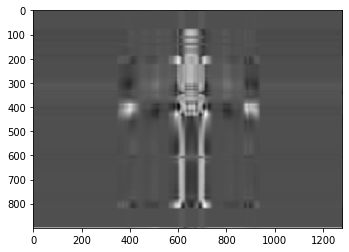

R = 10


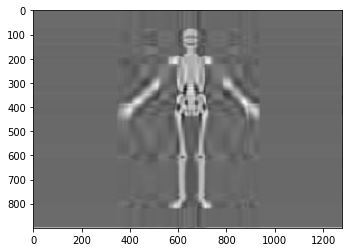

R = 50


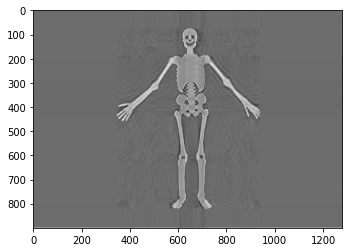

R = 100


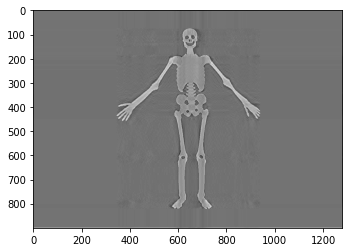

R = 500


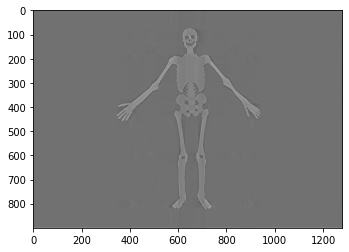

In [29]:
import matplotlib.pyplot as plt

# Importing our image
img = plt.imread("svd_skeleton.jpg")
img = rgb2gray(img)

# Determining parameters
R_vals = [5,10,50,100,500]

# Displaying approximation
for R in R_vals:
    new_approx = approx(img,R)
    print("R =",R)
    plt.figure()
    plt.imshow(new_approx,cmap='gray')
    plt.show()